Contains 10 categories of images:

1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
import os

batch_size = 32
num_classes = 10
epochs = 10

# Loads the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# formate our training data by normalizing and changing data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Now we one hot encode outputs
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

# Padding = 'same' results in padding the input such that
# the output has the some Length as the original input
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# initiate RMSdrop optimizer and configure same parameters
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Lets create our model
model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

print(model.summary())

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512) 

In [ ]:
keras.utils.plot_model(
model,
to_file="model_cifar.png"
)

TRAINING OUT MODEL

In [3]:
history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_test, y_test),
                   shuffle=True)

model.save("cifar_simple_cnn_2.h5")

# Evaluate the performace of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 964s 19ms/step - loss: 1.6385 - accuracy: 0.4118 - val_loss: 1.3317 - val_accuracy: 0.5260
Epoch 2/10
50000/50000 [==============================] - 1350s 27ms/step - loss: 1.2897 - accuracy: 0.5468 - val_loss: 1.1641 - val_accuracy: 0.5938
Epoch 3/10
50000/50000 [==============================] - 1254s 25ms/step - loss: 1.1462 - accuracy: 0.5987 - val_loss: 1.1058 - val_accuracy: 0.6110
Epoch 4/10
50000/50000 [==============================] - 1084s 22ms/step - loss: 1.0504 - accuracy: 0.6344 - val_loss: 1.0243 - val_accuracy: 0.6421
Epoch 5/10
50000/50000 [==============================] - 1112s 22ms/step - loss: 0.9742 - accuracy: 0.6625 - val_loss: 0.9669 - val_accuracy: 0.6646
Epoch 6/10
50000/50000 [==============================] - 1276s 26ms/step - loss: 0.9191 - accuracy: 0.6826 - val_loss: 0.9488 - val_accuracy: 0.6752
Epo

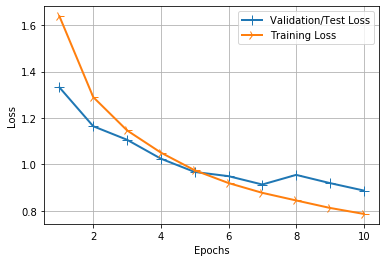

In [4]:
# plotting out loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

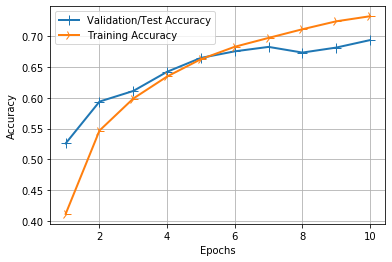

In [5]:
# Plotting the accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

Lets run some tests

In [18]:
import cv2
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
classifier = load_model('cifar_simple_cnn_2.h5')
color = True
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = "airplane"
    if res == 1:
        pred = "automobile"
    if res == 2:
        pred = "bird"
    if res == 3:
        pred = "cat"
    if res == 4:
        pred = "deer"
    if res == 5:
        pred = "dog"
    if res == 6:
        pred = "frog"
    if res == 7:
        pred = "horse"
    if res == 8:
        pred = "ship"
    if res == 9:
        pred = "truck"
        
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    if color == False:
        expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 80), cv2.FONT_HERSHEY_COMPLEX_SMALL,3, (0,255,0), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im  = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,img_row, img_height, img_depth)
    
    # Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
    
    draw_test("Prediction", res, imageL, scale, img_row, img_height)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()